<a href="https://colab.research.google.com/github/comHack/Mammography_DL_Classification/blob/master/data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [12]:
import pickle

import cv2 as cv

import matplotlib.pyplot as plt

import os

import random

from google.colab import drive

# **Mounting Drive**

In [7]:
drive.mount('/gdrive')
os.symlink('/gdrive/My Drive', '/content/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


FileExistsError: ignored

# **Data**

### **Setup the data**

In [8]:
# data folder link to the images_resized_2 folder in your drive
data_folder = '/gdrive/My Drive/Breast Cancer Detection/images_resized_2'

# classes
classes = ['benign', 'malign']

In [9]:
print(os.listdir(os.path.join(data_folder, classes[0])))

['aug_989.png', 'aug_990.png', 'aug_991.png', 'aug_992.png', 'aug_993.png', 'aug_994.png', 'aug_995.png', 'aug_996.png', 'aug_997.png', 'aug_998.png', 'aug_999.png', 'aug_1000.png', 'aug_1001.png', 'aug_1002.png', 'aug_1003.png', 'aug_1004.png', 'aug_1005.png', 'aug_1006.png', 'aug_1007.png', 'aug_1008.png', 'aug_1009.png', 'aug_1010.png', 'aug_1011.png', 'aug_1012.png', 'aug_1013.png', 'aug_1014.png', 'aug_1015.png', 'aug_1016.png', 'aug_1017.png', 'aug_1018.png', 'aug_1019.png', 'aug_1020.png', 'aug_1021.png', 'aug_1022.png', 'aug_1023.png', 'aug_1024.png', 'aug_1025.png', 'aug_1026.png', 'aug_1027.png', 'aug_1028.png', 'aug_1029.png', 'aug_1030.png', 'aug_1031.png', 'aug_1032.png', 'aug_1033.png', 'aug_1034.png', 'aug_1035.png', 'aug_1036.png', 'aug_1037.png', 'aug_1038.png', 'aug_1039.png', 'aug_1040.png', 'aug_1041.png', 'aug_1042.png', 'aug_1043.png', 'aug_1044.png', 'aug_1045.png', 'aug_1046.png', 'aug_1047.png', 'aug_1048.png', 'aug_1049.png', 'aug_1050.png', 'aug_1051.png', 'a

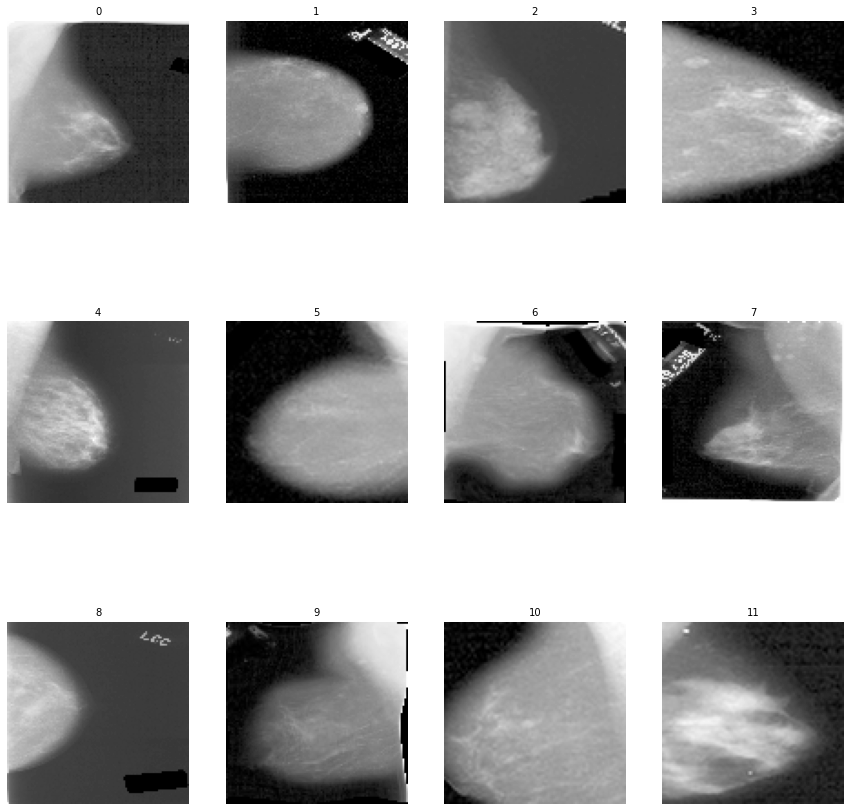

In [20]:
W_grid = 3
L_grid = 4

fig, ax = plt.subplots(W_grid, L_grid, figsize = (15, 15))

ax = ax.ravel()

classe = 0

path = os.path.join(data_folder, classes[classe])

images = os.listdir(path)

for i in range((W_grid * L_grid)):

  image = os.path.join(path, images[random.randint(0, len(images))]) 

  image_arr = cv.imread(image, cv.IMREAD_GRAYSCALE)

  new_arr = image_arr / 255

  ax[i].imshow(image_arr, cmap='gray')

  ax[i].set_title(i, fontsize = 10)

  ax[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [21]:
print(image_arr.shape)

(100, 100)


In [22]:
def create_data():
  '''
    create the data as grayscale images (1 channel (cv.IMREAD_GRAYSCALE))
    
    returns a list of pairs containing the image matrix and it's label
  '''
  data = []
  for classe in classes:
    path = os.path.join(data_folder, classe)
    classe_num = classes.index(classe)
    for image in os.listdir(path):
      image_arr = cv.imread(os.path.join(path, image), cv.IMREAD_GRAYSCALE)
      data.append([image_arr, classe_num])
    
  return data

In [24]:
# creating the data (grayscale images)
data = create_data()

In [25]:
A = data.copy()

In [28]:
print(len(data))

3988


In [27]:
# seperating the benign and the malign (grayscale images)
benign_data = A[:1988].copy()
malign_data = A[1988:].copy()

In [29]:
print(len(benign_data))

1988


In [30]:
print(len(malign_data))

2000


In [31]:
print(benign_data[1987][1])

0


In [32]:
# saving the arrays as pickle files for later usage (grayscale images)
pickle_out = open("benign.pickle", "wb")
pickle.dump(benign_data, pickle_out)
pickle_out.close()

pickle_out = open("malign.pickle", "wb")
pickle.dump(malign_data, pickle_out)
pickle_out.close()

In [33]:
def create_data_3():
  '''
    create the data as rgb images (3 channels)

    returns a list of pairs containing the image matrix and it's label 
  '''
  data = []
  for classe in classes:
    path = os.path.join(data_folder, classe)
    classe_num = classes.index(classe)
    for image in os.listdir(path):
      image_arr = cv.imread(os.path.join(path, image))
      data.append([image_arr, classe_num])
    
  return data

In [34]:
# creating the data (rgb images)
data_3 = create_data_3()

In [35]:
A_3 = data_3.copy()

In [ ]:
print(A_3[2])
print(len(A_3))

In [37]:
# seperating the benign and the malign (rgb images)
benign_data_3 = A_3[:1988].copy()
malign_data_3 = A_3[1988:].copy()

In [38]:
# saving the arrays as pickle files for later usage (rgb images)
pickle_out = open("benign_3.pickle", "wb")
pickle.dump(benign_data_3, pickle_out)
pickle_out.close()

pickle_out = open("malign_3.pickle", "wb")
pickle.dump(malign_data_3, pickle_out)
pickle_out.close()